In [552]:
%matplotlib inline
import re
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import scipy
from scipy.integrate import simps
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from skimage.restoration import unwrap_phase
from skimage import color, exposure
from tifffile import imread, imwrite
from skimage.transform import resize
import os
#from phase_unwrap import phase_unwrap, _wrapToPi

#plt.style.use('dark_background')


#from phase_unwrap import *

In [553]:
def natural_sort_key(s, _nsre=re.compile('([0-9]+)')):
    return [
        int(text)
        if text.isdigit() else text.lower()
        for text in _nsre.split(s)]


In [554]:
# Load image into Python
def load_img(addpath):
    # Images with neutral density filter
    #addpath = "D://bets_images//01.03.23._20.02//01.03.23._20.19//02.24.23._16.18//"

    # Images with no neutral density filter
    # addpath = ('/Users/charlyk/Desktop/PhD/work/Images/04.21.23._22.18/No_ND/')
    sorted_images = sorted(os.listdir(addpath), key=natural_sort_key)
    # Load the RGB hologram image
    #img = Image.open(addpath+'img.tif').convert("L")
    images=[]
    for i,frame in enumerate(sorted_images[307:337]):
        img = Image.open(addpath+frame )
        if (i+1) < len(sorted_images):
            #width, height = img.size
            ref = Image.open(addpath+ sorted_images[i+1])
            #ref=ImageOps.fit(ref, (1080,720), Image.Resampling.LANCZOS)
    

            # Convert the RGB image to grayscale
            # gray_image = rgb_image.convert("L")
            img = img.convert("L")
            ref = ref.convert("L")

            # Convert the image to a NumPy array
            img = np.asarray(img)/255                  # convert the images into array
            ref = np.asarray(ref)/255
            
            img = img[914:990,297:417]
            ref = ref[914:990,297:417]
            
            imgH = (img - ref) #/ (np.sqrt(ref))
            Ny,Nx = imgH.shape

            Lambda = 530e-9            # wavelength of the light source
            k = 2*np.pi/Lambda         # wavenumber
            dx = 1.55e-6               # pixel size of the camera in the x-coord
            dy = dx
            UpsampleFactor = 2

            # Define the spatial and frequency/spectral sampling intervals and coords
            nx = np.arange((-Nx/2),(Nx/2) , dtype = float)
            ny = np.arange((-Ny/2),(Ny/2) , dtype = float)

            # Spatial sampling
            x = nx*dx
            y = ny*dy

            X, Y = np.meshgrid(x,y)
            # Frequency sampling
            dfx = 1/(Nx *dx)
            dfy = 1/(Ny *dy)

            fx = nx*dfx
            fy = ny*dfy
            Fx,Fy = np.meshgrid(fx,fy)

            d1 = 1e-5
            FimgH = fftshift(fft2(imgH))
            prop1 = np.exp((1j*2*np.pi*d1)*np.sqrt((1/(Lambda**2)) - Fx**2 - Fy**2))
            t1 = (ifft2(fftshift(FimgH*prop1)))
            amp = (abs(t1))                   # amplitude

            images.append(amp**2)
            
    

            #plt.imshow(img)
    return images
    

In [555]:
path="C://Users//kande//OneDrive//Desktop//Particle_trac//frame//09_20_2023//"
# # img,ref=load_img(path)
# import re
# # plt.imshow(img)
# my_list=os.listdir(path)
# def natural_sort_key(s, _nsre=re.compile('([0-9]+)')):
#     return [
#         int(text)
#         if text.isdigit() else text.lower()
#         for text in _nsre.split(s)]

# sorted_images = sorted(my_list, key=natural_sort_key)


# print(sorted_images)

In [556]:
imagelist=load_img(path)





print(len(imagelist))




30


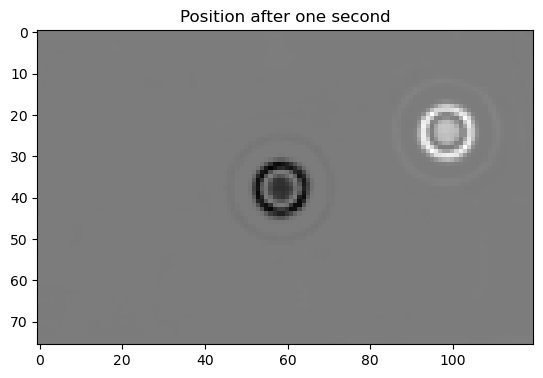

In [557]:
plt.imshow(imagelist[0]-imagelist[29],cmap='gray')
plt.title('Position after one second')
#plt.savefig('First two second ')

plt.show()

Text(0.5, 1.0, 'Intensity of a single frame')

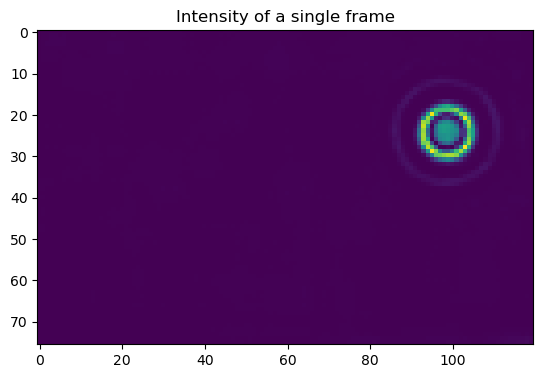

In [558]:
plt.imshow(imagelist[0])
plt.title("Intensity of a single frame")
#plt.savefig('Intensity ')

In [559]:
import cv2
import numpy as np


# Define the output file name and properties
output_file = 'output_movie.mp4'
fps = 10.0

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_file, fourcc, fps, (200, 200))

# Write each frame to the video file
for frame in imagelist:
    out.write(frame)

# Release the VideoWriter object and close the file
out.release()


In [560]:
#%matplotlib tk
plt.imshow(imagelist[30])

IndexError: list index out of range

In [561]:
# import time
# fig, ax = plt.subplots(1, 1)

# # Display the arrays one by one with a time delay

# for i in range(len(imagelist)):
#     ax.imshow(imagelist[i], cmap='gray')
#     ax.set_title('Array '+str(i))
#     plt.show()
#     time.sleep(1)

# # ax.imshow(imagelist[5], cmap='gray')
# # ax.set_title('Array 2')
# # plt.show()
# # time.sleep(1)

# # ax.imshow(imagelist[10], cmap='gray')
# # ax.set_title('Array 3')
# # plt.show()

In [562]:
# from matplotlib.animation import FuncAnimation, FFMpegWriter

# fig, ax = plt.subplots()

# def animate(i):
      
#     if i >= 0:
#         #ax.cla()
#         ax.imshow(imagelist[i])
# nsteps=11


# simulation = FuncAnimation(fig, animate, frames = nsteps, repeat = False)




# from IPython.display import HTML
# HTML(simulation.to_jshtml())

# # simulation.save('animation.mp4', writer='ffmpeg')


In [563]:
# import cv2
# import numpy as np

# # Read the image
# image = cv2.imread('image.jpg')

# # Find the location of the maximum pixel value
# max_index = np.unravel_index(np.argmax(imagelist[4]), imagelist[4].shape)

# # Convert the maximum index to integers
# max_index = tuple(map(int, max_index))

# # Draw a circle around the maximum pixel
# radius = 10
# color = (0, 0, 255)  # Red color (BGR)
# thickness = 2
# cv2.circle(imagelist[4], max_index, radius, color, thickness)

# # Display the image with the circle
# cv2.imshow('Image with Circle', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [564]:
# import pyDigitalHolography as dh

# # Load digital hologram
# holo = dh.load_hologram('digital_hologram.tif')

# # Reconstruct the complex field
# field = holo.reconstruct()

# # Perform particle detection
# particles = dh.detect_particles(field)

# # Perform particle tracking
# tracks = dh.track_particles(particles)

# # Plot particle tracks
# dh.plot_tracks(tracks)


In [565]:

sorted_images = sorted(os.listdir(path), key=natural_sort_key)

print(sorted_images[44])

frame_90.tif


In [566]:

import cv2
import numpy as np

def find_image_centroid(image):
    # Read the image using OpenCV
    #image = cv2.imread(image_path)

    # Calculate the moments of the image
    moments = cv2.moments(image)

    # Calculate the centroid
    centroid_x = int(moments["m10"] / moments["m00"])
    centroid_y = int(moments["m01"] / moments["m00"])

    return centroid_x, centroid_y

# Replace 'image.jpg' with the path to your image file
#image_path = 'image.jpg'
centroid = find_image_centroid(imagelist[1])
print("Centroid coordinates:", centroid)


Centroid coordinates: (87, 27)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Initial position:(88, 27) 
 Final position:(58, 37)
[88, 87, 88, 87, 86, 85, 84, 82, 81, 80, 79, 78, 76, 76, 75, 74, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 61, 60, 59, 58]
[27, 27, 27, 27, 28, 28, 29, 29, 29, 30, 30, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 36, 36, 36, 37, 37, 37]


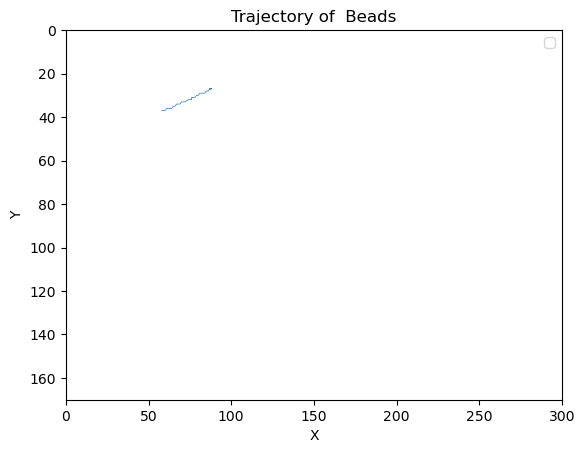

In [567]:

X=[]
Y=[]
for img in imagelist:
    centroid = find_image_centroid(img)
    X.append(centroid[0])
    Y.append(centroid[1])
fig, ax = plt.subplots()    
ax.plot(X,Y,linewidth=.5)
# ax.plot(X1,Y1,linewidth=.5 ,label="1st")
# ax.plot(X2,Y2,linewidth=.5,label="2nd")
# ax.plot(X3,Y3,linewidth=.5,label="3rd")
ax.set_xlim(0,300)
ax.set_ylim(0,170)
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.legend()
ax.invert_yaxis()



plt.title("Trajectory of  Beads")
#plt.show()
#plt.savefig("Trajectory(30_frame_diff)")

print(f'Initial position:{(X[0],Y[0])} \n Final position:{(X[-1],Y[-1])}')
#print(f'Speed:{np.sqrt((X[0]-Y[0])^2 +(X[-1]-Y[-1])^2)/34.2*1.55}')
print(X)
print(Y)

In [568]:
#first
a1=[141, 143, 145, 145, 144, 143, 142, 142, 141, 140, 139, 138, 136, 135, 134, 133, 132, 130, 129, 128, 127, 126, 125, 123, 122, 121, 120, 119, 117, 116]
b1=[52, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 57, 58, 58, 58, 58, 59, 59, 59, 60, 60, 60, 61, 61, 61, 62]
X1=[x-73 for x in a1]
Y1=[x-15 for x in b1]

In [569]:
#second
X2=[81, 79, 77, 75, 73, 71, 68, 66, 64, 62, 60, 58, 56, 54, 51, 49, 47, 45, 43, 41, 39, 37, 34, 32, 30, 28, 26, 24, 22, 20] 
Y2=[40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41]


In [570]:
#Third paarticle

a3=[88, 87, 88, 87, 86, 85, 84, 82, 81, 80, 79, 78, 76, 76, 75, 74, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 61, 60, 59, 58] 
b3=[27, 27, 27, 27, 28, 28, 29, 29, 29, 30, 30, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 36, 36, 36, 37, 37, 37]
X3=[x-0 for x in a3]
Y3=[x+6 for x in b3]

Initial position:(88, 27) 
 Final position:(58, 37)
[88, 87, 88, 87, 86, 85, 84, 82, 81, 80, 79, 78, 76, 76, 75, 74, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 61, 60, 59, 58]
[27, 27, 27, 27, 28, 28, 29, 29, 29, 30, 30, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 36, 36, 36, 37, 37, 37]


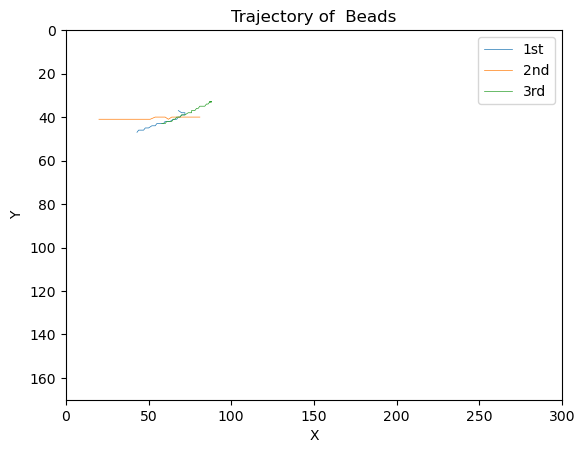

In [572]:

X=[]
Y=[]
for img in imagelist:
    centroid = find_image_centroid(img)
    X.append(centroid[0])
    Y.append(centroid[1])
fig, ax = plt.subplots()    
#ax.plot(X,Y,linewidth=.5)
ax.plot(X1,Y1,linewidth=.5 ,label="1st")
ax.plot(X2,Y2,linewidth=.5,label="2nd")
ax.plot(X3,Y3,linewidth=.5,label="3rd")
ax.set_xlim(0,300)
ax.set_ylim(0,170)
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.legend()
ax.invert_yaxis()



plt.title("Trajectory of  Beads")
#plt.show()
plt.savefig("2Nd_Trajectory(30_frame_diff)")

print(f'Initial position:{(X[0],Y[0])} \n Final position:{(X[-1],Y[-1])}')
#print(f'Speed:{np.sqrt((X[0]-Y[0])^2 +(X[-1]-Y[-1])^2)/34.2*1.55}')
print(X)
print(Y)

## first particle
Initial position:(273, 72) 
Final position:(261, 77)
[273, 279, 287, 284, 280, 278, 277, 281, 280, 280, 279, 277, 275, 273, 273, 273, 271, 269, 269, 267, 269, 269, 268, 268, 266, 266, 266, 265, 263, 260, 261]
[72, 71, 69, 70, 71, 71, 71, 70, 70, 71, 70, 71, 72, 72, 73, 73, 73, 73, 74, 74, 74, 74, 75, 75, 76, 76, 76, 76, 76, 77, 77]

In [341]:
a1=[273, 279, 287, 284, 280, 278, 277, 281, 280, 280, 279, 277, 275, 273, 273, 273, 271, 269, 269, 267, 269, 269, 268, 268, 266, 266, 266, 265, 263, 260, 261]
b1=[72, 71, 69, 70, 71, 71, 71, 70, 70, 71, 70, 71, 72, 72, 73, 73, 73, 73, 74, 74, 74, 74, 75, 75, 76, 76, 76, 76, 76, 77, 77]

In [342]:
X1=[x-132 for x in a1]
Y1=[x-30 for x in b1]

## second particle
Initial position:(185, 76) 
Final position:(114, 99)
[185, 185, 183, 180, 178, 175, 173, 171, 168, 166, 163, 161, 158, 156, 153, 151, 148, 146, 143, 141, 138, 136, 133, 131, 128, 126, 123, 121, 119, 116, 114]
[76, 77, 77, 78, 79, 80, 80, 81, 82, 83, 84, 84, 85, 86, 87, 87, 88, 89, 90, 90, 91, 92, 93, 93, 94, 95, 96, 96, 97, 98, 99]

## Third particles
Initial position:(206, 29) 
Final position:(169, 46)
[206, 207, 207, 206, 205, 203, 202, 201, 200, 199, 197, 195, 194, 193, 192, 190, 189, 187, 186, 184, 182, 181, 180, 178, 177, 176, 174, 173, 172, 170, 169]
[29, 29, 28, 29, 30, 30, 31, 31, 32, 32, 33, 34, 35, 35, 36, 36, 37, 38, 38, 39, 40, 40, 41, 42, 42, 43, 44, 44, 45, 45, 46]

## 2 first particle
Initial position:(141, 52) 
Final position:(116, 62)
[141, 143, 145, 145, 144, 143, 142, 142, 141, 140, 139, 138, 136, 135, 134, 133, 132, 130, 129, 128, 127, 126, 125, 123, 122, 121, 120, 119, 117, 116]
[52, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 57, 58, 58, 58, 58, 59, 59, 59, 60, 60, 60, 61, 61, 61, 62]


## 2 second particle
Initial position:(81, 40) 
Final position:(20, 41)
[81, 79, 77, 75, 73, 71, 68, 66, 64, 62, 60, 58, 56, 54, 51, 49, 47, 45, 43, 41, 39, 37, 34, 32, 30, 28, 26, 24, 22, 20]
[40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41]

## 3 Third particle
Initial position:(88, 27) 
Final position:(58, 37)
[88, 87, 88, 87, 86, 85, 84, 82, 81, 80, 79, 78, 76, 76, 75, 74, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 61, 60, 59, 58]
[27, 27, 27, 27, 28, 28, 29, 29, 29, 30, 30, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 36, 36, 36, 37, 37, 37]

In [12]:
import numpy as np


print(f'Speed:{np.sqrt((185-114)^2 +(86-99)^2)/1}')

Speed:nan


C:\Users\kande\AppData\Local\Temp\ipykernel_18928\2566022245.py:4: RuntimeWarning: invalid value encountered in sqrt
  print(f'Speed:{np.sqrt((185-114)^2 +(86-99)^2)/1}')


In [26]:
print(f'Speed:{np.sqrt((88-58)^2 +(37-27)^2)/1}')

Speed:4.0
